### 18-6. Convolutional Neural Network (CNN, 합성곱신경망)

- 합성곱 (Convolution)연산을 활용하여, 이미지와 같은 데이터에서 중요한 특징(Feature)을 자동으로 추출하는 신경망 알고리즘
- 일반적으로 CNN은 입력 이미지를 여러 단계에 걸쳐 점진적으로 압축하면서 중요한 정보를 보존
- 압축된 정보를 이용해 분류 또는 회귀 작업을 수행하는 데 사용
- 구성
  - 합성곱 필터 (Convolution Layer)
  - 풀링 필터 (Pooling Layer)
  - 완전 연결 필터 (Fully Connected Layer)

### Convolution Process (합성곱 프로세스)

- 이미지에서 추출된 RGB 값을 Filter (Layer)를 사용하여 간단한 차원의 숫자데이터로 변환
- 큰 크기의 차원을 각각의 필터를 걸어 축소
- 각 필터에는 데이터의 특징을 뽑아낼 수 있게끔 연산을 수행하는 구조
- 이미지의 특성이 반영되게 끔 차원을 줄이는 작업
- 절차
  - Filtering : 작은 크기의 행렬을 이용하여, 이미지의 특징을 추출
  - Sliding : 이미지의 일정 간격만큼 움직이며, 필터링을 지속적으로 수행
  - Padding : 입력값의 크기를 유지하기 위해 입력 이미지의 가장자리를 0값으로 채움

### Pooling Process

- 앞서 처리된 이미지 특성이 나타나있는 Matrix를 축소
- 차원 축소(Down Sampling)을 목적으로 데이터의 크기를 줄이는 작업
- 종류
  - Max Pooling
    - 주어진 윈도우 내에서 최대값을 선택
    - 이미지의 가장 중요한 특징을 찾을 때 사용 (경계 Edge / 텍스처 Texture 등을 강조)
    - 모델의 민감도를 낮추고 중요한 특징을 살려 차원이 축소
  - Averge Pooling
    - 주어진 윈도우 내 데이터의 평균을 계산하여 축소
    - 이미지의 일반적인 패턴을 추출할 때 사용
    - 세부적인 특징 보다는 일반적인 정보를 반영

In [1]:
from PIL import Image # 이미지를 파이썬에서 사용 
import pandas as pd 
import numpy as np
import os 

- 해당 데이터는 자동차 차량 Wind Shield 부품을 생산할 때 발생한 데이터
- 차량 전면 A필러 쪽 바람을 막기위한 부품으로, 제품의 두께에 따라 불량/정상 결정 됨
- 해당 작업을 제품의 두께를 일일히 측정하여 제품을 분류했으나, 제품의 이미지를 이용해 불량/정상 분류 모델

In [2]:
# 이미지 파일이 있는 경로를 호출 
image_path = 'data/27_wind_shield_vision_data/left_images/'

# 해당 폴더 내 있는 이미지 파일 명을 호출 
file_name_list = os.listdir(image_path)
file_name_list

['1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '

In [3]:
image_path + file_name_list[0]

'data/27_wind_shield_vision_data/left_images/1.jpg'

In [4]:
# 폴더 내 있는 데이터 하나를 출력 
image1 = Image.open( image_path + file_name_list[0] )

이미지를 먼저 숫자 데이터 형태로 변환 (Image -> RGB)

In [5]:
import tensorflow as tf 
from keras.preprocessing import image

In [6]:
# 앞서 호출한 image1 (1.jpg)이미지를 RGB값으로 변환 
image_array = image.img_to_array(image1)
image_array # 변환 된 RGB 값이 3중 array로 표현 (RGB 정보 X 가로축 X 세로축) 

array([[[ 49., 124., 252.],
        [ 49., 124., 252.],
        [ 49., 124., 252.],
        ...,
        [ 53., 123., 253.],
        [ 54., 123., 253.],
        [ 54., 123., 253.]],

       [[ 49., 124., 252.],
        [ 49., 124., 252.],
        [ 49., 124., 252.],
        ...,
        [ 52., 123., 251.],
        [ 52., 123., 251.],
        [ 52., 123., 251.]],

       [[ 52., 122., 252.],
        [ 52., 122., 252.],
        [ 52., 122., 252.],
        ...,
        [ 49., 122., 250.],
        [ 51., 122., 250.],
        [ 51., 122., 250.]],

       ...,

       [[ 55., 117., 254.],
        [ 55., 117., 254.],
        [ 55., 117., 254.],
        ...,
        [ 55., 117., 254.],
        [ 55., 117., 254.],
        [ 55., 117., 254.]],

       [[ 55., 117., 254.],
        [ 55., 117., 254.],
        [ 55., 117., 254.],
        ...,
        [ 55., 117., 254.],
        [ 55., 117., 254.],
        [ 55., 117., 254.]],

       [[ 55., 117., 254.],
        [ 55., 117., 254.],
        [ 55., 1

In [7]:
# 이미지의 Pixel 값을 정규화 
# Pixcel 값 : 0 ~ 255 
# 정규화 -> Pixel값을 255로 나누어 0과 1사의 값으로 표현이 되도록 변환 

#이미지 사이즈를 규격화 
image_array2 = tf.image.resize(image_array, (320, 256))
image_array2_scale = image_array2/255 # 각 pixel 값을 0~ 1사이 값으로 정규화 
image_array2_scale[0]

<tf.Tensor: shape=(256, 3), dtype=float32, numpy=
array([[0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.19215687, 0.4862745 , 0.9882353 ],
       [0.18235295, 0.49558824, 0.9818627 ],
       [0.13872549, 0.54901963, 0.9313725 ],
       [0.2367647 , 0.5       , 0.9142157 ],
       [0.30490196, 0.45490196, 0.92696077],
       [0.25441176, 0.4759804 , 0.95686275],
       [0.13333334, 0.58235294, 0.91862744],
       [0.05490196, 0.702451  , 0.722549  ],
       [0.19411765, 0.82254905, 0.4852941 ],
       [0.5093137 , 0.8387255 , 0.29313725],
     

In [8]:
# 각 임지를 구분할 수 있는 차원을 부여 
# (여러장의 이미지를 불러왔을 때, 각 이미지를 구분할 수 있는 차원을 추가) 
result_img = tf.expand_dims(image_array2_scale, axis=0)
result_img.shape # 이미지 각 장 x 가로 x 세로 x RGB  

TensorShape([1, 320, 256, 3])

폴더 내 전체 이미지를 변환하여 구성

In [9]:
def load_image_tf(image_path):
    # 모든 이미지를 가져와 Pixel 및 Tensor로 변환 후 데이터를 담을 공간 
    processed_images = []
    for i in os.listdir(image_path): # 사용자가 함수에 입력한 폴더 내 파일 이름을 하나씩 i로 선언
        # i로 선언된 파일 명을 이용하여 이미지를 호출 
        img = Image.open(image_path + i)
        # img를 array 배열로 변환 
        img_array = image.img_to_array(img)
        # 배열로 변환된 이미지를 규격화 및 스케일링 
        img_tensor = tf.image.resize(img_array, (320,256))
        img_sacle  = img_tensor/255
        # 각 이미지를 구분하는 차원을 추가 
        img_batch = tf.expand_dims(img_sacle, axis=0)
        # 앞서 처리된 텐서 형태 이미지 구조를 processed_images 리스트에 추가 
        processed_images.append(img_batch)
    return processed_images

In [10]:
# 왼쪽 A필러 윈드실드 머신비전 데이터를 Tensor 형태로 변환 
result_image_left = load_image_tf(image_path)

In [11]:
len(result_image_left) 

414

- 목표변수
- 각 이미지의 두께를 측정한 파일을 불러와 처리
- 양품/불량의 기준 : 정상 규격 - 0.8mm ~ 1.5mm

In [12]:
df_label = pd.read_csv('data/27_wind_shield_vision_data/left_label.csv', header=None)
# header=None : 항목 명이 없는 CSV 파일 데이터에 대해 임의의 항목명을 부여 
df_label.head(3)

,0
0,1.58
1,1.59
2,1.60


In [13]:
# 정상/불량을 구분 
cond1 = (df_label[0] >= 0.8) & (df_label[0] <=1.5) # 제품 정상 조건 
df_label.loc[cond1,  'Label'] = 0 # 정상 조건을 만족하면, Label 파생변수에 0 입력 
df_label.loc[~cond1, 'Label'] = 1 # 정상 조건을 만족하지 않는다면, Label 파생변수에 1 입력 
# 정상 - 0 / 불량 - 1 구분 
df_label['Label'].value_counts()

Label
0.0    293
1.0    121
Name: count, dtype: int64

In [14]:
# 앞서 이미지가 수집된 리스트를 Tensor 형태로 변환하여 X_train선언 
X_train = tf.concat(result_image_left,axis=0)
# 앞서 처리된 제품 두께 판별값도 Y_train 으로 선언 
Y_train = tf.convert_to_tensor(df_label['Label'].values)

In [15]:
# 합성곱 신경망 구현을 위한 라이브러리 호출 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D 
from keras.layers import Dense # Fully Connected Layer 
from keras.layers import Dropout
from keras.layers import Flatten # 처리된 이미지 정보를 Vector로 변환 

### Fully Connected Layer 완전연결층

- 다중 신경망 모델로, 앞서 추출된 이미지의 특정을 바탕으로 최종 예측을 수행

In [16]:
model_CNN = Sequential() # 전체 신경망 Layer 구조를 구성 
# Convolution Layer 
# Conv2D(32, (3,3) : 32개의 Node로 구성된 3x3행렬의 Filter 
model_CNN.add( Conv2D(32, (3,3), input_shape=(320,256,3), activation='relu'))
# Pooling Layer 
# 앞서 처리된 수행결과에 2x2 필터를 적용하여 Pooling 
model_CNN.add( MaxPool2D(pool_size=(2,2) ))
# 앞서 Convolution과 Pooling을 반복하여 수행 (차원을 줄이고, 특징을 추출) 
model_CNN.add( Conv2D(32,(3,3), activation='relu'))
model_CNN.add( MaxPool2D(pool_size=(2,2) ))
# Fully-Connected Layer 
model_CNN.add( Flatten() ) # 앞서 처리된 Image를 1차원 Vector 형태로 변환 
model_CNN.add( Dense(128, activation='relu')) # 128개의 Node로 구성된 Layer 추가 
# 50% Dropout을 수행 /  Random하게 50%비율로 특정 Node에서 통과 / 
# 이미지는 Overfitting이 매우 잘 발생하기 때문에 Dropout 비율을 높게 설정 
model_CNN.add( Dropout(0.5)) 
# 출력값을 계산 
model_CNN.add( Dense(1, activation='sigmoid'))
# 최적화 수행
model_CNN.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model_CNN.fit(X_train, Y_train, epochs=20, validation_split=0.3)

C:\Users\leedo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.5899 - loss: 4.2183 - val_accuracy: 0.8400 - val_loss: 0.5557
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.6411 - loss: 0.6674 - val_accuracy: 0.8400 - val_loss: 0.4721
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.6428 - loss: 0.6763 - val_accuracy: 0.8400 - val_loss: 0.6216
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.6442 - loss: 0.6402 - val_accuracy: 0.8400 - val_loss: 0.5514
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.6901 - loss: 0.6017 - val_accuracy: 0.8400 - val_loss: 0.5386
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.6849 - loss: 0.5982 - val_accuracy: 0.2320 - val_loss: 1.0333
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.8058 - loss: 0.4606 - val_accuracy: 0.4640 - val_loss: 0.7025
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - accuracy: 0.7237 - loss: 0.5587 - val_accuracy: 0.

In [17]:
def threshold_func(result):
    if result >= 0.5:
        return 1 
    return 0 

In [18]:
Y_train_pred = pd.Series(model_CNN.predict(X_train).flatten()).apply(threshold_func)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       293
         1.0       0.41      0.66      0.50       121

    accuracy                           0.62       414
   macro avg       0.61      0.63      0.60       414
weighted avg       0.69      0.62      0.64       414



일반화 성능 평가

In [21]:
# 검증 데이터 불러오기 (오른쪽 wind shield 데이터)
image_path_right = 'data/27_wind_shield_vision_data/right_images/'
result_image_right = load_image_tf(image_path_right)

In [22]:
len(result_image_right)

423

In [23]:
# 검증 데이터의 Y 목표변수도 호출 및 처리 
df_label_right = pd.read_csv('data/27_wind_shield_vision_data/right_label.csv', header=None)
df_label_right.shape

(423, 1)

In [24]:
cond1 = (df_label_right[0]>= 0.8) &(df_label_right[0]<=1.5)
df_label_right.loc[cond1,  'Label'] = 0 
df_label_right.loc[~cond1, 'Label'] = 1

In [25]:
# 검증 데이터셋 구성 
X_test = tf.concat(result_image_right, axis=0)
Y_test = tf.convert_to_tensor(df_label_right['Label'].values)

In [26]:
# 예측 및 평가 
Y_test_pred = pd.Series(model_CNN.predict(X_test).flatten()).apply(threshold_func)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step 


In [27]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       333
         1.0       0.27      0.59      0.37        90

    accuracy                           0.57       423
   macro avg       0.55      0.58      0.52       423
weighted avg       0.72      0.57      0.61       423



In [28]:
# 생성된 모델을 저장 
model_CNN.save('model_CNN.keras')

### 18-7. Recurrent Neural Network (RNN, 순환신경망)

- Sequence Data 순차적인 데이터를 처리하기 위한 Deep Learning 모델
- Sequence Data : 시계열 / 자연어
  - 나는 고양이를 좋아해 -> 나 / 고양이 / 좋아하다
  - 고양이는 나를 좋아해 -> 고양이 / 나 / 좋아하다
- 이전의 정보를 현재의 상태에 반영하여 시간에 따라 변하는 입력을 처리
- 이를 통해 언어 모델링, 기계번역, 음성인식, 등 다양한 영역으로 활용
- 특징 :
  - 순환 구조 : RNN은 내부에 순환구조를 가지고 있어, 이전 시간 단계의 출력을 다음시간 단계의 입력으로 사용
  - 단계별 파라미터 공유 : RNN은 각 시간 단계에서 동일한 가중치를 사용하여 입력을 처리하기 때문에, 파라미터를 각 Layer 공유 (Model이 Sequence의 장기 의존성을 학습)
  - 시간적 의존성 모델링 : RNN은 시간적로 연속된 입력 데이터의 패턴을 학습 / 시간에 따라 (순서나 서열)에 따라 변화하는 데이터의 예측/ 분류

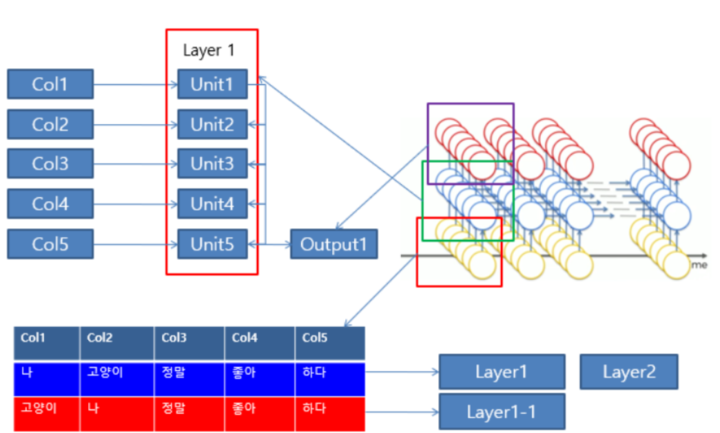

In [29]:
df1 = pd.read_csv('../hanro_test/0428/24_Data.csv')
print(df1.shape)
df1.head()

(95, 12)


,Unnamed: 0,part,former,regions,date,text,good,bad,hope,same,recom,help
0,0,교육,전직원,서울,2025. 04 작성,나쁘지않은 근무환경과 동기들의 인성이 좋았습니다.,"장점금융 대기업, 커리어발전에 굉장히 좋은 회사입니다. 슈퍼갑","단점맛있는 밥, 하지만 매번 똑같은 옥상에서의 풍경, 경치가 그리좋지 않아요",경영진에 바라는 점복지를 좀 더 늘려줬으면 합니다. 식대를 좀 지원좀해주세요,1년 후에도 비슷할 것 같아요,기업을 추천해요,1
1,1,전문직,전직원,서울,2025. 03 작성,같이 일하는 사람들이 젠틀하고 사무실 분위기가 아주 좋습니다. 배리굿,장점팀장님이 인간적으로 대해주며 항상 배려해주는 말이 매너가 너무 좋습니다.,단점조용해서 의사소통이 적은 것이 흠이고 상담직이라 점심시간이 촉박하고 시간이 금방...,경영진에 바라는 점직원들간에 의사소통이 더욱 필요하고 직원생일파티 등 적극적인 회사...,1년 후에도 비슷할 것 같아요,기업을 추천해요,0
2,2,기획/경영,전직원,서울,2025. 03 작성,"단순 업무, 하지만 시기를 잘못..선택하면...","장점칼퇴가능, 쉽게 조퇴 및 휴가 가능합니다. \n구내식당이 맛있다.","단점너무 업무가 단순하고, 업무 안에서 배울 수 있는 것이 많이 없다.",경영진에 바라는 점업무 분배를 잘 해주셨으면 좋을 것 같다..,1년 후에도 비슷할 것 같아요,기업을 추천하지 않아요,0
3,3,금융/재무,현직원,서울,2025. 03 작성,소소합니다 그냥 평범합니다 금융공기업,장점공기업의 위엄이 다르지요 앞다투어 들어오는 그런곳입ㅂ니다,단점아무런 변화가 없는것 같은 그런 모습들 무엇이 맞는것인지,경영진에 바라는 점변화를 원하질 않고 자기의 안위만 쳉기지말자,1년 후에도 비슷할 것 같아요,기업을 추천해요,0
4,4,금융/재무,현직원,서울,2025. 01 작성,금융 분야 공익에서의 최고 직장입니다,장점금융분야에서 공적인 일을 하고 싶다면 추천\n금융 정책 및 규제에서 전문성을 쌓...,단점모든 공공 분야가 그렇지만 복지다 점점 감소하고 있다.,경영진에 바라는 점경영진이 낙하산으로 오기 때문에 단기적인 시각을 가지고 있다 구성...,1년 후에도 비슷할 것 같아요,기업을 추천해요,1


In [30]:
df2 = df1[['good', 'bad']].melt()
df2.isnull().sum()

variable    0
value       0
dtype: int64

In [31]:
df2['Target'] = df2['variable'].replace({'good':1, 'bad':0})

C:\Users\leedo\AppData\Local\Temp\ipykernel_5440\3917846718.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Target'] = df2['variable'].replace({'good':1, 'bad':0})


In [32]:
X = df2[['value']]
Y = df2['Target']

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, random_state=1234)

In [35]:
# 자연어 처리 
from konlpy.tag import Okt 
import re # 정규 표현식 

In [36]:
okt = Okt() # 형태소 분석기 
# 형태소 분석 : 
# 토큰화 (문장을 가장 작은 말의 단위로 나누는 작업) + 품사부착 (나눠진 말에 품사를 부착) 

In [37]:
# 불용어 및 특수문자를 제거 하며, 형태소 분석 
clean_word_train = [] 
for i in X_train['value']:
    # 한글자 이상의 특수기호를 모두 공백으로 변환 
    review_text = re.sub(r'\W+', " ", i)
    # 변환된 문장을 형태소 분석을 통해 처리 
    word_text = okt.morphs(review_text, stem=True)
    # 불용어 처리 
    stop_word = ['적','인','를','가','면','이','의','에','은','는','을','에','도']
    # 리스트 컴프리 헨션을 활용해, 불용어 리스트에 있는 단어는 제외 
    word_text_clean = [x for x in word_text if not x in set(stop_word)]
    clean_word_train.append(word_text_clean)

In [38]:
clean_word_test = [] 
for i in X_test['value']:
    review_text = re.sub(r'\W+', " ", i)
    word_text = okt.morphs(review_text, stem=True)
    stop_word = ['적','인','를','가','면','이','의','에','은','는','을','에','도']
    word_text_clean = [x for x in word_text if not x in set(stop_word)]
    clean_word_test.append(word_text_clean)

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer # 각 단어를 정수로 변환 
from keras.preprocessing.sequence import pad_sequences 
# Padding : 비정형 데이터에서 데이터의 길이가 서로 맞지 않는 경우, 
#           지정된 길의 데이터 만큼 데이터를 자르거나, 0값으로 채워넣는 기법 

In [40]:
# 토크나이저 적용 : 형태소 분석에 의해 분해된 형태소를 숫자로 변환 
token_model = Tokenizer()
token_model.fit_on_texts(clean_word_train) # 어떤 단어를 어떤 숫자로 매칭할지 결정 

In [41]:
# 변환 
train_seq = token_model.texts_to_sequences(clean_word_train)
test_seq  = token_model.texts_to_sequences(clean_word_test)

In [42]:
# Padding : 문장의 길이를 맞추는 작업 
X_train_vec = pad_sequences(train_seq, maxlen=20, padding='post')
X_test_vec  = pad_sequences(test_seq,  maxlen=20, padding='post')

In [43]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import SimpleRNN 
from keras.layers import Embedding

In [44]:
# RNN 모형 구성 
model_RNN = Sequential()
model_RNN.add( Embedding(10000, 8 ,input_length=20 ) )
model_RNN.add( SimpleRNN(20) )
model_RNN.add( Dense(1, activation='sigmoid'))
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_RNN.fit(X_train_vec, Y_train, epochs=20, validation_split=0.3)

Epoch 1/20


C:\Users\leedo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.4360 - loss: 0.7020 - val_accuracy: 0.6279 - val_loss: 0.6730
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7836 - loss: 0.6598 - val_accuracy: 0.8140 - val_loss: 0.6530
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9569 - loss: 0.6158 - val_accuracy: 0.8140 - val_loss: 0.6217
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9754 - loss: 0.5545 - val_accuracy: 0.8372 - val_loss: 0.5739
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9908 - loss: 0.4745 - val_accuracy: 0.8605 - val_loss: 0.5032
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.3791 - val_accuracy: 0.8605 - val_loss: 0.4311
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.2806 - val_accuracy: 0.8605 - val_loss: 0.3764
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.2139 - val_accuracy: 0.8837 - val_loss: 0.3417
Epoch 9/20

In [45]:
Y_train_pred = pd.Series(model_RNN.predict(X_train_vec).flatten()).apply(threshold_func)
Y_test_pred  = pd.Series(model_RNN.predict(X_test_vec).flatten()).apply(threshold_func)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [46]:
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        69
           1       0.95      0.99      0.97        73

    accuracy                           0.96       142
   macro avg       0.97      0.96      0.96       142
weighted avg       0.97      0.96      0.96       142

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.95      0.95      0.95        22

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



### 19. 자연어 처리 (NLP)

- Natural Language 자연어 : 사람들이 일상적으로(구어체, 문어체) 사용하는 언어
- Natural Language Preprocessing : 컴퓨터가 자연어를 이해하거나 생성할 수 있도록 데이터를 처리하는 모든 기술
- 컴퓨터 관점에서 자연어 처리의 과정
  - 언어 -> 컴퓨터 : 컴퓨터가 사람의 언어를 이해하는 과정 (NLU)
  - 컴퓨터 -> 언어 : 컴퓨터가 사람의 언어를 사용하는 과정 (NLG)
- 전산 언어학 (Computational Linguistics)
  - 컴퓨팅 기술을 언어학에 활용하는 분야
  - 컴퓨터 공학 + 언어학 + 통계학
- 어려운 이유
  1. 언어의 중의성 (참 잘 ~ 한다) -> 긍정/부정의 해석이 갈릴 수 있음
  2. 규칙 예외 -> 표준화된 언어에 벗어나는 경우
  3. 유연함 및 확장성 -> 유행어/ 관행적 표현
  4. 음성 처리 (STT, Speech to Text) -> 동의어 /맥락/ 흐름에 따라 해석이 달라짐
     - 물이 있다 -> [무리있다]
    
- 언어처리에서 패러다임 변화
  1. 규칙 기반 : 사전에 정의된 문법적 규칙을 이용해 사람의 언어를 처리
     - 언어의 중의성 / 규칙예외 한계점
    
  2. 통계 기반 : 조건부 확률을 이용해, 문장에 오는 단어들의 순서 확률 값을 분석하여, 단어 출현 빈도 등을 파악 및 분석 (맥락 파악)
 
     - 대량의 문장 분석이나 중의적 의도 파악 등의 한계점
    
  3. 기계 학습 기반 (텍스트 마이닝) : 전수 조사 중심의 학습체계를 통해, 텍스트 마이닝 기술이 전개(텍스트 분류 / 유사도 파악)
 
  4. 신경망 알고리즘 기반 : 대량의 문장분석, 의도파악을 포함해, 자연어 생성과 같은 기술들이 전개 (기계번역 / 음성처리)

### 자연어 처리 연산

- Edit Distance : 2개의 객체(단어)가 얼마나 다른지 숫자로 나타낸 척도
  - Cat / Hat : 1
  - 단어 간 유사성 확인
  - 철자오류 수정/ 문자열 매칭/ 자동완성 / 유사 단어 검색 ...
- Stemming : 어간 추출 / 단어의 본래 형태로 추출
  - Going -> Go / Computer -> Compute
  - 문장의 의도를 파악하고 처리
  - 어간을 단순히 잘라내는 방식으로, 어휘적 의미와는 상관없이 규칙에 따라 어미나 접미사를 제거
  - Rule Base 기반
- Lemmatization : 표제어 (Lemma : 단어 사전에 올라가 있는 기본형)을 찾는 작업 (문장 내 표제어를 찾는 연산)
  - 문장의 의도 파악 / 단어의 유사성을 파악
  - Stemming과 달리 정확한 의미 보존을 목표로 함

In [47]:
import nltk # NLTK (Natural Language Toolkit) : 언어의 기호 및 통계기반 자연어 처리 라이브러리 

In [48]:
# Edit Distance 
from nltk.metrics import edit_distance

In [49]:
edit_distance('cat', 'hat')

1

In [50]:
# Stemming 
from nltk.stem import PorterStemmer

In [51]:
PorterStemmer().stem('Computer')

'comput'

In [52]:
PorterStemmer().stem('Going')
# 컴퓨터가 단어의 원형을 처리하는 기본 '사전'을 가지고 있음 

'go'

In [56]:
# 표제어 처리 : 단어 사전을 다운로드 
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [57]:
from nltk.stem import WordNetLemmatizer

In [58]:
WordNetLemmatizer().lemmatize('ate',pos='v')

'eat'

### 형태소 분석과 개체명 인식

1. 형태소 분석 (Morphological Analysis)
   - 문장을 형태소 단위로 나누어 품사를 부착하는 분석
   - 형태소 (POS, Part Of Speech) 가장 작은 말의 단위
   - 형태소 분석은 자연처리의 기초작업으로, 문장을 구성하는 단어의 형태적 구조를 파악하여 분석하는 과정
   - Tokenizing + Tagging 으로 구성
     - Tokenizing : 텍스트를 특정 단위로 나누는 것
       A. 어절 분리 (Word Separation) : 문장을 단어 단위로 분리
       B. 문장 분리 (Sentence Separation) : 문단을 문장으로 분리
     - Tagging : 나눠진 언어 객체에 항목을 부여 (품사를 부착)
        - 문맥에 따라 같은 단어도 다른 품사를 가질 수 있어, 문맥을 고려한 태깅이 필요
      
2. 개체명 인식 (Named-Entity Recognition)

   - 특정 명사에 대해 사람/조직/장소 등을 구분하여, 문장의 맥락을 이해, 동의 구분등을 수행
   - Named-Entity : 사람/조직/장소 등을 가진 단어

**Tagging Description**

- CC : 접속사
- CD : 숫자
- DT : 한정사
- EX : 존재구문
- FW : 외국어
- IN : 전치사 또는 종속 접속사
- JJ : 형용사
- JJR : 형용사 비교급
- JJS : 형용사 최고급
- MD : 조동사
- NN : 명사 (단수 또는 질량)
- NNS : 명사 (복수)
- NNP : 고유명사(단수)
- NNPS : 고유명사(복수)
- PDT : 전치 한정사
- POS : 소유격
- PRP : 인칭 대명사
- PRP$ : 소유 대명사
- PB : 부사
- PBR : 부사 비교급
- PBS : 부사 최상급
- RP : 조사
- SYM : 상징
- TO : to
- UH : 감탄사
- VB : 동사
- VBD : 동사 과거형
- VBG : 동명사 /현재 분사
- VBN : 동사 (단수, 현재)
- VBZ : 동사 (3인칭 단수, 현재)
- WDT : 의문 한정사

In [59]:
# 형태소 분석 
text1 = 'show me the money'

# 토크나이징 (어절 분리)
token1 = nltk.word_tokenize(text1)
token1

['show', 'me', 'the', 'money']

In [60]:
nltk.pos_tag(token1)

[('show', 'VB'), ('me', 'PRP'), ('the', 'DT'), ('money', 'NN')]

In [66]:
# 개체명 인식 
# !pip install svgling

In [67]:
text2 = """I got my peaches out in Georgia (oh, yeah, shit),
I get my weed from California"""

In [68]:
# 어절분리 
token2 = nltk.word_tokenize(text2)
token2

['I',
 'got',
 'my',
 'peaches',
 'out',
 'in',
 'Georgia',
 '(',
 'oh',
 ',',
 'yeah',
 ',',
 'shit',
 ')',
 ',',
 'I',
 'get',
 'my',
 'weed',
 'from',
 'California']

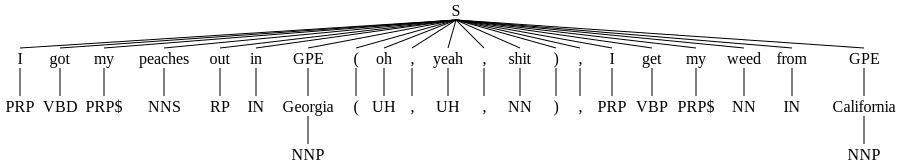

In [69]:
# 개체명 인식 
tag1 = nltk.pos_tag(token2)
nltk.chunk.ne_chunk(tag1)

**불용어 처리**

- Stopword (불용어) : 관사/전치사/조사/접속사 등과 같이 의미가 없는 단어
- 문장을 검색할 때, 분해 할 때, 빈도수 파악, 의미파악, 텍스트 분류에서 불용어를 처리해야만 원할한 분석이 가능

### 한국어 자연어 처리

형태소 분석기
- Okt(Open Korean Text) :
  - 과거 트위터(현 X)에 올라온 글들을 이용해 형태소 분석기를 구성
  - 구어체(말할 때 사용하는 어체)에 적절하게 사용
  - 사전 기반의 분석과 규칙을 통해 품사를 부착
  - 다른 형태소 분석기에 비해 빠름
- KKma : Java 기반의 형태소 분석기
  - 규칙 기반 형태소 분석기
  - 속도가 비교적 느림
  - 형태소 분석에서 구문분석, 문장의 문법적 구조를 세밀하게 분석할 때 사용
- Komoran : Java 기반의 형태소 분석기
  - 머신러닝 알고리즘 기반의 형태소 분석기
  - 공백이 포함된 고유명사 잘 분류함
  - 다른 형태소 분석기와 다르게, 여러 어절을 하나의 품사로 분석이 가능
  - 성능이 안정적이고 비교적 빠르지만, '사전'의 업데이트가 수작업으로 이뤄져, 최신 단어나 새로운 고유명사에 대한 처리가 제한적
- Hannanum : Java 기반의 형태소 분석기
  - 규칙기반의 형태소 분석기
  - 품사 태깅과 구문분석을 지원하며, 다양한 언어를 처리 및 연구할 때 유용
  - 복잡한 형태소 분석 규칙을 적용하기에, 문장의 정확한 구조를 분석하는데 강점 / 속도가 느림

In [70]:
from konlpy.tag import Okt 
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

In [71]:
okt = Okt()
kkma = Kkma()
komoran = Komoran()
han = Hannanum()

In [72]:
text3 = '호의가 계속되면 그게 권리인줄 알아요' 
# 형태소 분석 수행 
print(okt.morphs(text3))
print(kkma.morphs(text3))
print(komoran.morphs(text3))
print(han.morphs(text3))

['호의', '가', '계속', '되면', '그게', '권리', '인', '줄', '알아요']
['호의', '가', '계속', '되', '면', '그', '게', '권리', '이', 'ㄴ', '줄', '알', '아요']
['호의', '가', '계속', '되', '면', '그', '게', '권리', '인줄', '알', '아요']
['호의', '가', '계속', '되', '면', '그', '이', '게', '권리', '이', 'ㄴ', '줄', '알', '아요']


In [73]:
# 두 글자 이상의 어절로 분해 
text4 = '싸늘하다. 가슴에 비수가 날아와 꽂힌다. 하지만 걱정 하지마라. 손은 눈보다 빠르니까'
print(okt.phrases(text4))
print(kkma.morphs(text4))
print(komoran.morphs(text4))
print(han.morphs(text4))

['가슴', '비수', '걱정']
['싸늘', '하', '다', '.', '가슴', '에', '비수', '가', '날아오', '아', '꽂히', 'ㄴ다', '.', '하지만', '걱정', '하지', '마라', '.', '손', '은', '눈', '보다', '빠르', '니까']
['싸늘', '하', '다', '.', '가슴', '에', '비수', '가', '날아오', '아', '꽂히', 'ㄴ다', '.', '하지만', '걱정', '하', '지', '말', '아라', '.', '손은', '눈', '보다', '빠르', '니까']
['싸늘', '하', '다', '.', '가슴', '에', '비수', '가', '날', '아', '오', '아', '꽂히', 'ㄴ다', '.', '하지만', '걱정', '하지마', '이', '라', '.', '손', '은', '눈', '보다', '빠르', '니까']


In [74]:
text5 = """맷돌 손잡이를 어이라 그래요 어이. 
맷돌에 뭘 갈려고 집어놓고 맷돌을 돌리려고 하는데, 손잡이가 빠졌네?"""
print(okt.morphs(text5))
print(kkma.morphs(text5))
print(komoran.morphs(text5))
print(han.morphs(text5))

['맷돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.', '맷돌', '에', '뭘', '갈려고', '집어놓고', '맷돌', '을', '돌리려고', '하는데', ',', '손잡이', '가', '빠졌네', '?']
['맷돌', '손잡이', '를', '어이', '라', '그리하', '여요', '어이', '.', '맷돌', '에', '무엇', '을', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', '는데', ',', '손잡이', '가', '빠지', '었', '네', '?']
['맷돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.', '맷돌', '에', '뭘', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', '는데', ',', '손잡이', '가', '빠지', '었', '네', '?']
['맷돌', '손잡이', '를', '어이', '이', '라', '그렇', '어', '요', '어이', '.', '맷돌', '에', '뭐', '을', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', 'ㄴ데', ',', '손잡이', '가', '빠지', '었네', '?']


### 단어 표현 (Word Representation)

- 언어적 특성을 활용해 단어를 수치화 하여, 컴퓨터가 이해할 수 있는 형태로 변환
- Word Embedding 또는 Word Vector로 표현하기도 함
- 통계기반의 자연어 처리를 수행하는데 근간이 되는 기법
- 텍스트 마이닝 과 통계기법에 선행 단계
- One Hot Encoding
  - 문장의 모든 단어에 대해 0 또는 1값으로 변환
 
- Continuous Bag of Words (CBOW)
  - 문서 내 모든 단어를 모아, 각 단어가 문장에서 몇번 출현했는지 빈도수를 계산하여 표현
 
- TF-IDF (Term Frequence Inverse Document Frequency)
  - 문서 내 모든 단어를 모아, 각 단어가 문장에서 몇번 출현했는지 확률로 계산
  - 문장 내 특정 단어에 가중치 또는 패널티를 부여하여 출현 확률을 계산
- Skip-Gram
  - 중심 단어로부터 주변 단어의 출현확률을 예측, 주변 단어들이 어떤 단어가 올지에 대한 확률 모형을 계산